# Linear Regression

## I - Theory

Given a dataset where the output y is correlated to the variable X, linearely, we can finde a serie of coefficents (a,b) that fit the following criteria:<br>
\begin{equation*}
y_i = a * x_i + b 
\end{equation*}
using this formula we can predict the output of a value x with an error 
\begin{align} 
L(a,b) = \sum(y_i - \hat{y_i})²
\end{align}
based on the loss we calculated, we can use the gradient descent technic to fit the values of a, b.<br>
Given initial parameters a,b and a learning parameter lr, we start fitting those variables to get the local minima of our convex loss function.<br>
<center><img src="../images/loss.png" width="50%"></center>

## II - Code

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
X = [round(np.random.uniform(-10, 10), 2) for _ in range(100)]
y = [X[i]*(5+round(np.random.uniform(-3, 3), 2))+ round(np.random.uniform(-10, 10), 2) for i in range(100)]

In [28]:
data = pd.DataFrame(np.array([X,y])).T
data.columns = ['X', 'y']

In [29]:
data

,X,y
0,-2.10,0.9030
1,-4.22,-12.7916
2,9.32,58.3152
3,1.19,6.9552
4,2.86,27.0264
5,-3.01,-9.2072
6,-2.80,-11.7820
7,-7.52,-59.6096
8,-4.94,-16.4402
9,0.88,-6.1208


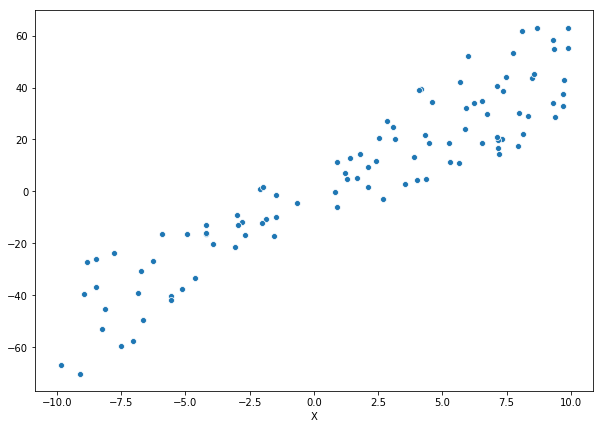

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='X', y=y, data=data)

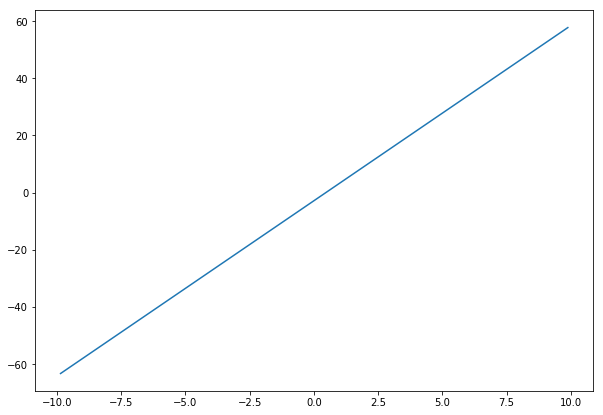

In [31]:
# Draw a line y = ax + b
a = round(np.random.uniform(-10,10), 2)
b = round(np.random.uniform(-10,10), 2)
def lin(x,a,b):
    return np.dot(x,a) + b

plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b))

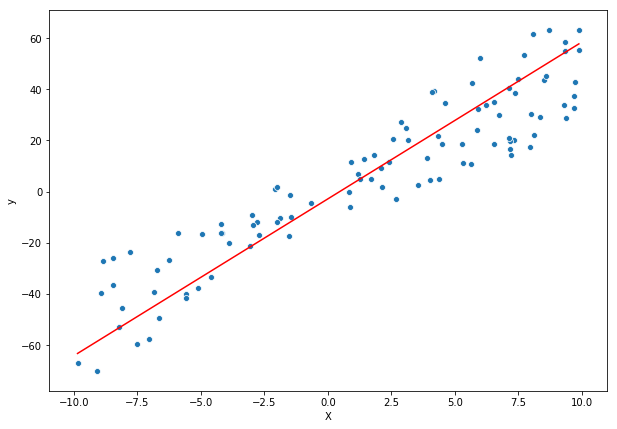

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.scatterplot(x='X', y='y', data=data)

In [33]:
a_1 = sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(y)-np.mean(data.y))) / sum(np.array(np.array(X)-np.mean(data.X)) * np.array(np.array(X)-np.mean(data.X)))
b_1 = np.mean(data.y) - a * np.mean(data.X)

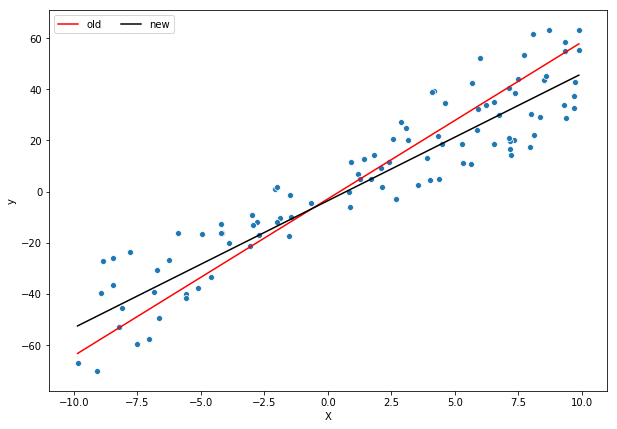

In [34]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.lineplot(X,lin(X, a_1, b_1),color="black")
sns.scatterplot(x='X', y='y', data=data)
plt.legend(['old','new'], ncol=2, loc='upper left')

### Gradient descent

In [35]:
def gradient(data, a, b):
    D_a = (-1/data.shape[0]) * sum(np.multiply(np.array(data['y']-np.array([b]*data.shape[0])-a*np.array(data['X'])),data['X']))
    D_b = (-1/data.shape[0]) * sum(np.array(data['y']-np.array([b]*data.shape[0])-a*np.array(data['X'])))
    return D_a, D_b
                        

In [36]:
EPOCHS = 1000
lr = 0.001
(a, b) = (1, 1)
for _ in range(EPOCHS):
    a, b = a - lr*gradient(data, a, b)[0], b - lr*gradient(data, a, b)[1]

print("a = {}, b ={}".format(round(a, 2),round(b, 2)))

a = 4.92, b =-0.58


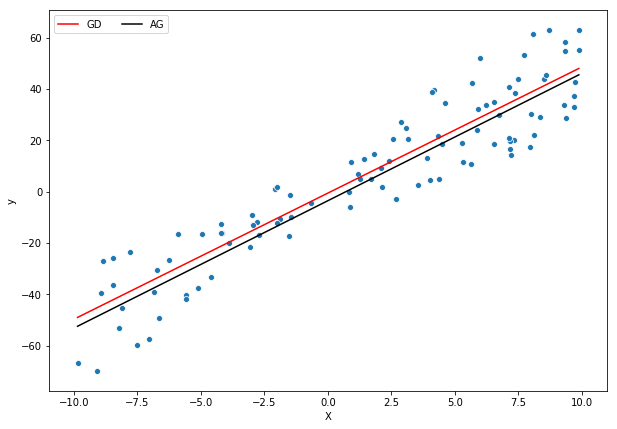

In [37]:
plt.figure(figsize=(10,7))
sns.lineplot(X,lin(X, a, b),color="red")
sns.lineplot(X,lin(X, a_1, b_1),color="black")
sns.scatterplot(x='X', y='y', data=data)
plt.legend(['GD','AG'], ncol=2, loc='upper left')

In [38]:
from sklearn.pipeline import Pipeline